In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle #to save the data
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Advertising.csv')

In [4]:
data.head() #check first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape #to know the total count of the data 

(200, 5)

In [6]:
data.info() #to know what kind of data it is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

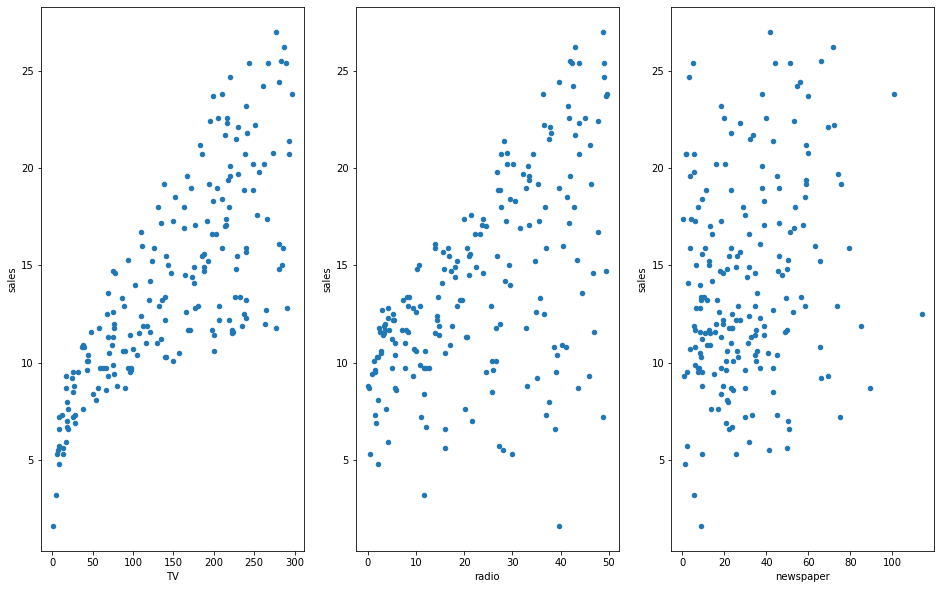

In [8]:
fig,axs = plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,10))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

In [9]:
x=data[['TV']]
y=data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [10]:
print(lm.intercept_)

7.032593549127694


In [11]:
print(lm.coef_)

[0.04753664]


In [12]:
X_new=pd.DataFrame({'TV':[50]})
X_new

,TV
0,50


In [13]:
lm.predict(X_new)

array([9.40942557])

In [16]:
lm.predict(X_new)

array([9.40942557])

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [19]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [20]:
x=data[['TV','radio','newspaper']]
y=data.sales
#from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [21]:
print('intercept',lm.intercept_)
print('TV       ',lm.coef_[0])
print('Radio    ',lm.coef_[1])
print('Newspaper',lm.coef_[2])

intercept 2.9388893694594067
TV        0.04576464545539761
Radio     0.18853001691820453
Newspaper -0.00103749304247629


In [22]:
lm=smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        00:13:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm=smf.ols(formula='sales~TV + radio ',data=data).fit()
lm.rsquared

0.8971942610828956

In [25]:
lm=smf.ols(formula='sales~TV + radio + newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

In [26]:
lm=smf.ols(formula='sales~ newspaper',data=data).fit()
lm.rsquared

0.05212044544430516

In [27]:
lm=smf.ols(formula='sales~ TV',data=data).fit()
lm.rsquared


0.611875050850071

In [28]:
lm=smf.ols(formula='sales~ radio',data=data).fit()
lm.rsquared

0.33203245544529536

In [29]:
lm.pvalues

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        00:13:46   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""